In [1]:
# Precipitation - inches (accumulation)  
# Temperature - Fahrenheit  
# Snow - Binary (0 - no snow, 1 - snow)
# Streamflow - ft³/s

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

import os
import random
import numpy as np
import tensorflow as tf

# Global Random State
RANDOM_STATE = 42

random.seed(RANDOM_STATE)                        # Python's built-in random
np.random.seed(RANDOM_STATE)                     # NumPy random seed
tf.random.set_seed(RANDOM_STATE)                 # TensorFlow/Keras random seed

# Gather Data

,PREC_Avg,TAVG_Avg,soilmoisture_Avg_8ft,Snow,streamflow
date,,,,,
2008-03-12,26.00,24.80,17.74,1,2360.0
2008-03-15,26.55,17.55,17.88,1,2260.0
2008-03-17,26.70,19.35,18.04,1,2260.0
2008-03-18,26.70,17.85,18.06,1,2260.0
2008-03-19,26.70,25.50,18.06,1,2200.0
...,...,...,...,...,...
2021-07-23,24.20,57.50,14.60,0,1170.0
2021-07-24,24.40,55.85,14.38,0,1240.0
2021-07-25,24.65,55.15,14.24,0,1190.0


,PREC_Avg,TAVG_Avg,soilmoisture_Avg_8ft,Snow,streamflow,prec_year,prec_rolling,temp_rolling,soil_rolling,dayofyear,sin_dayofyear,cos_dayofyear
date,,,,,,,,,,,,
2008-03-18,26.70,17.85,18.06,1.0,2260.0,185.125,26.446429,20.050000,17.900000,78,0.974100,0.226116
2008-03-19,26.70,25.50,18.06,1.0,2200.0,211.825,26.546429,20.150000,17.945714,79,0.977848,0.209315
2008-03-20,26.70,26.60,18.10,1.0,1930.0,238.525,26.620238,20.752381,17.990476,80,0.981306,0.192452
2008-03-21,26.75,24.00,18.14,1.0,1780.0,265.275,26.675000,21.328571,18.034286,81,0.984474,0.175531
2008-03-22,26.75,17.75,18.04,1.0,1740.0,292.025,26.703571,21.357143,18.057143,82,0.987349,0.158559
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-23,24.20,57.50,14.60,0.0,1170.0,3572.500,23.735714,60.271429,14.680000,204,-0.361714,-0.932289
2021-07-24,24.40,55.85,14.38,0.0,1240.0,3596.900,23.857143,59.914286,14.582857,205,-0.377708,-0.925925
2021-07-25,24.65,55.15,14.24,0.0,1190.0,3621.550,24.014286,58.785714,14.482857,206,-0.393590,-0.919286


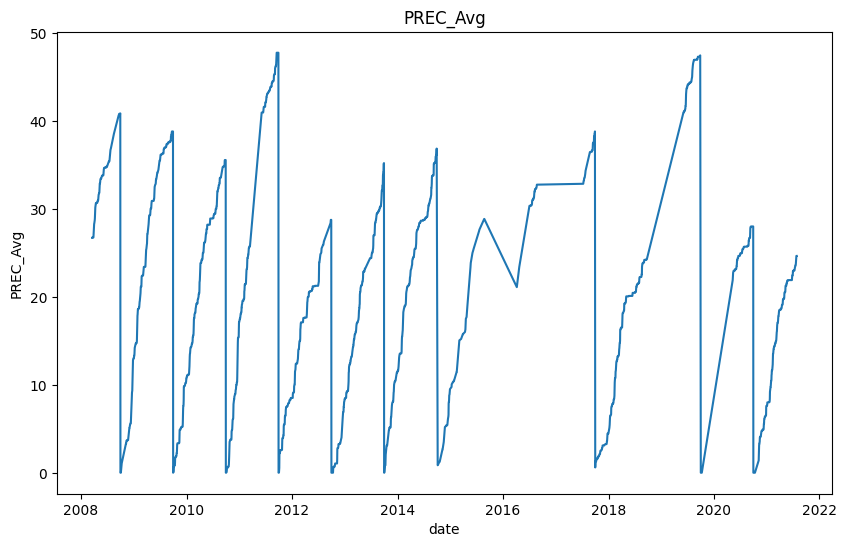

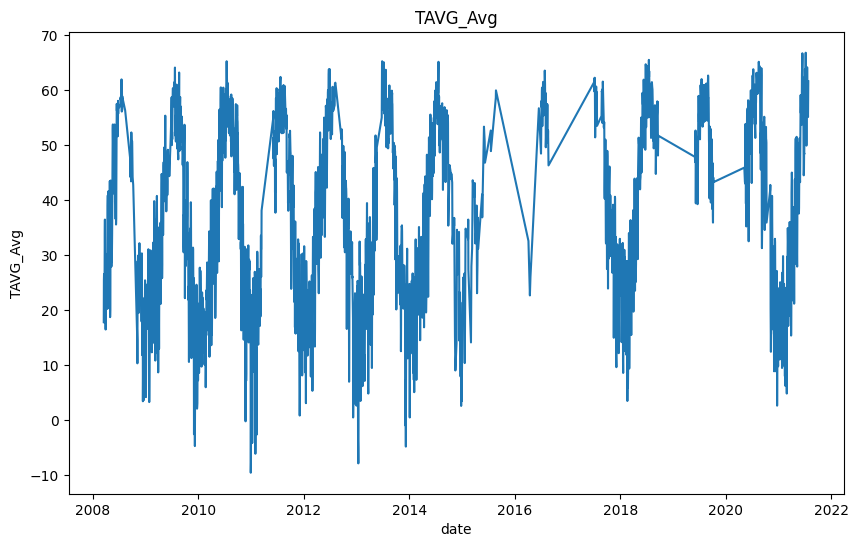

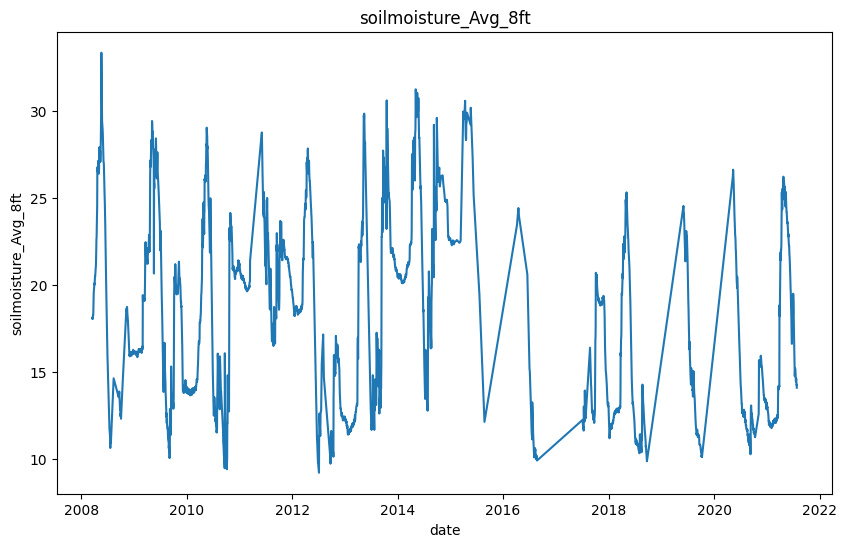

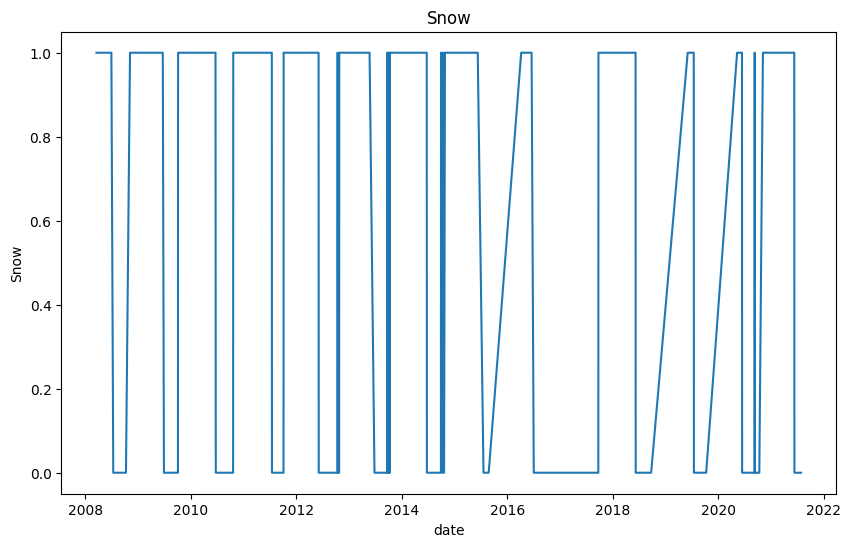

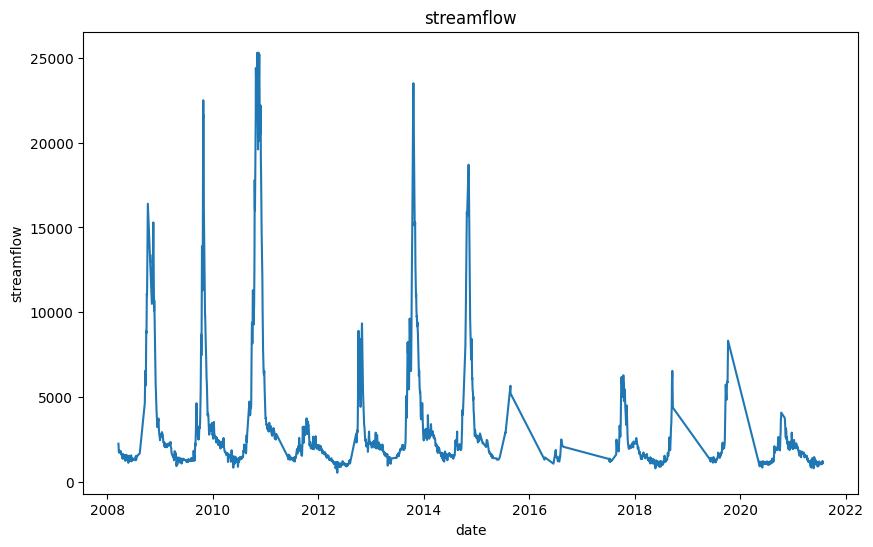

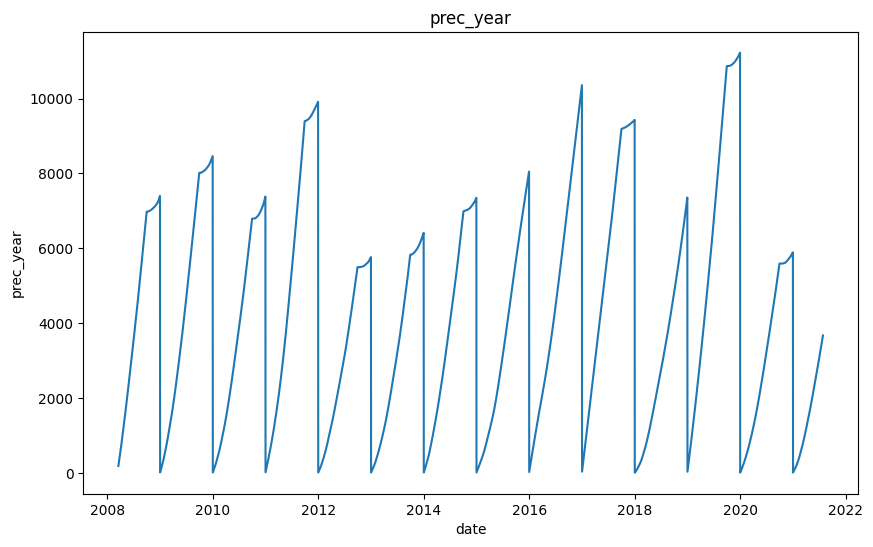

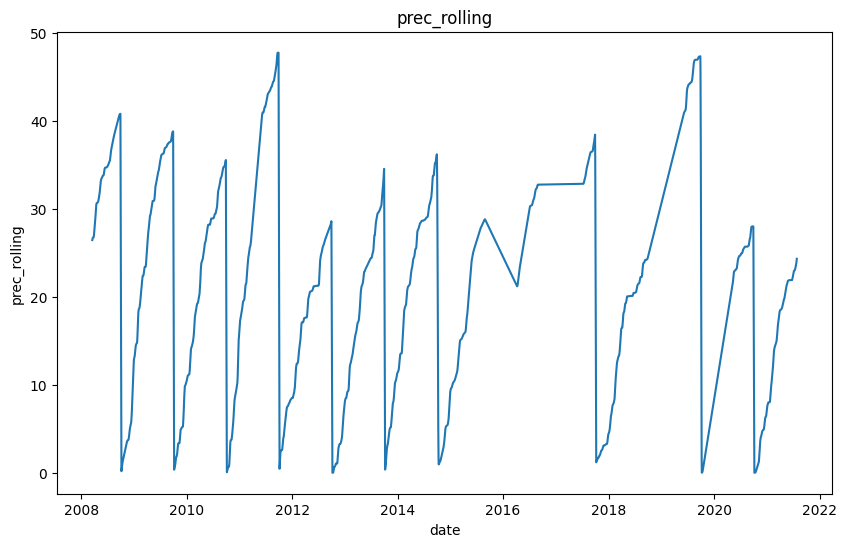

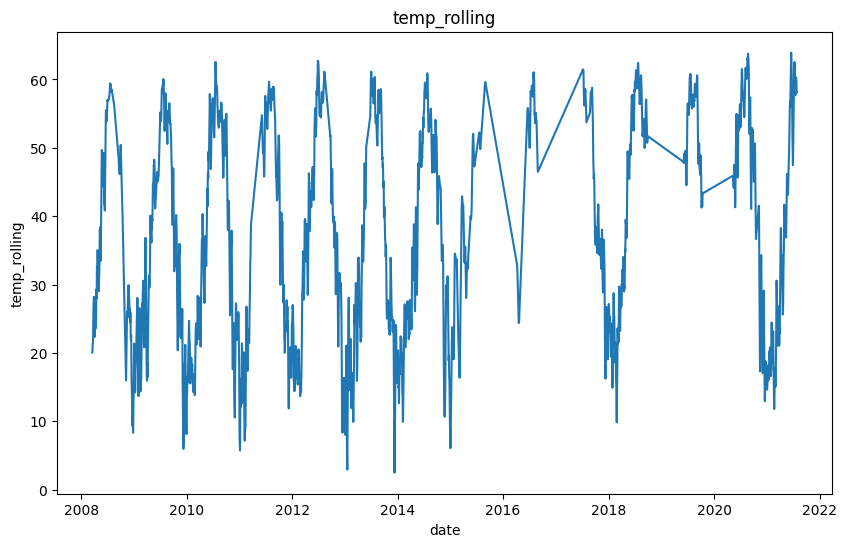

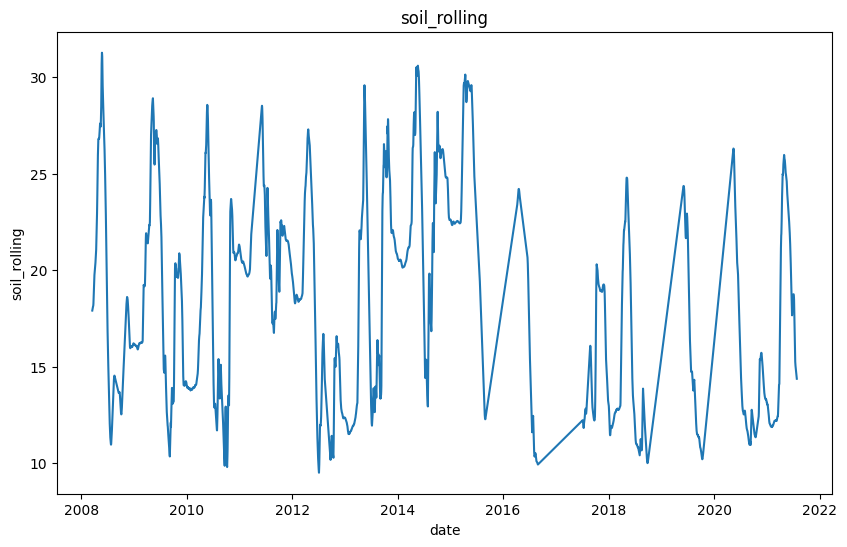

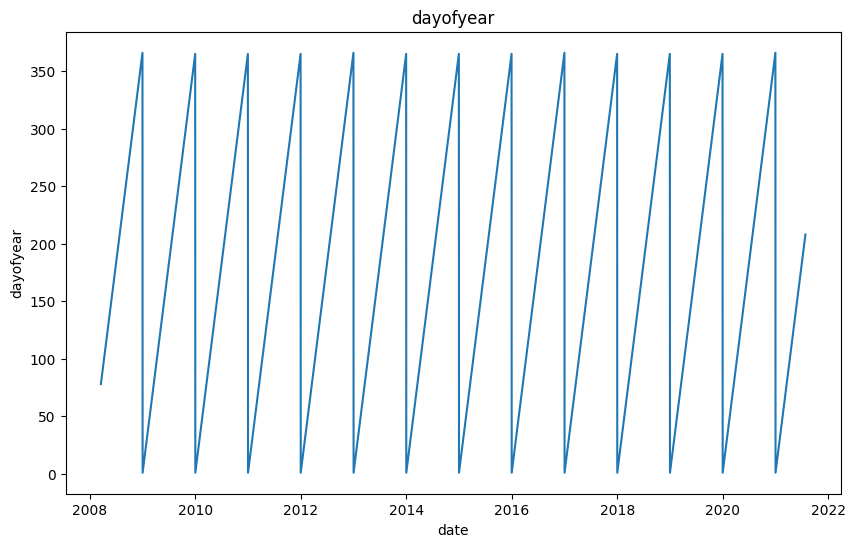

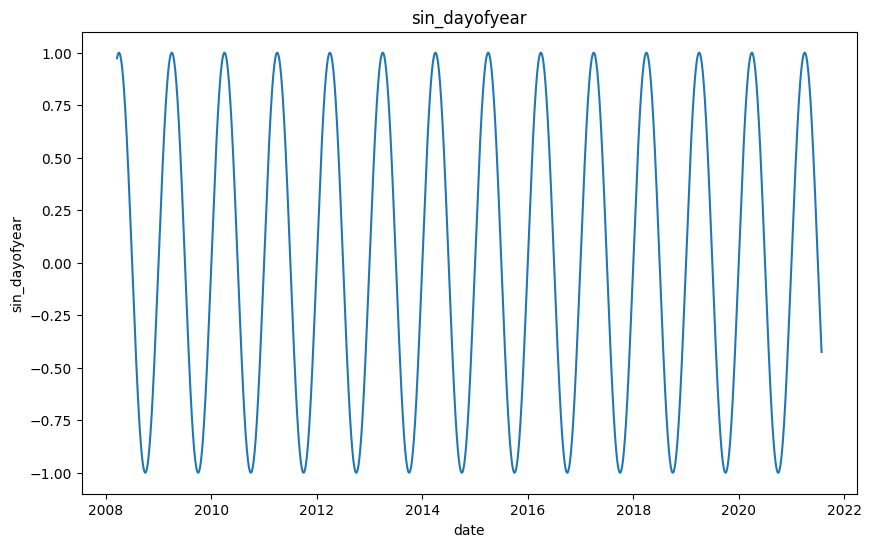

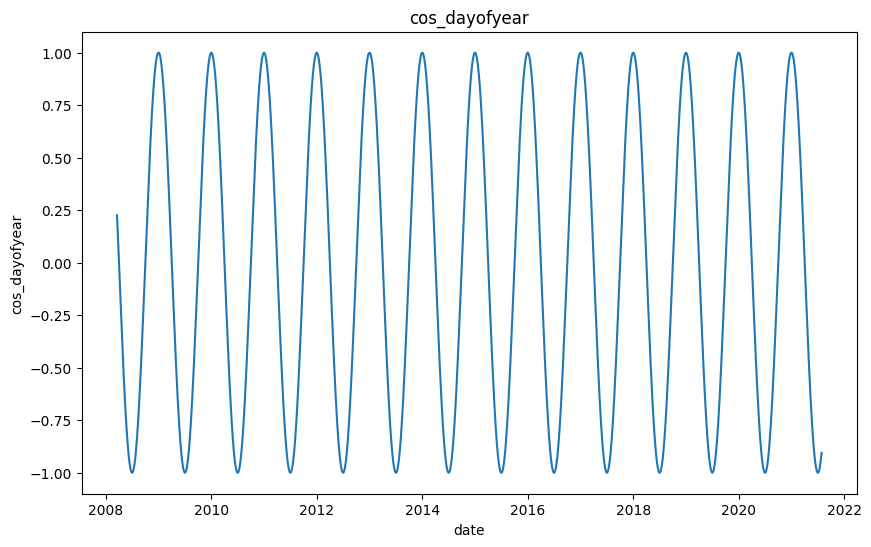

In [3]:
df = pd.read_csv('data/snow_soilmoisture_prediction_dataset.csv', index_col=0, parse_dates=True)
display(df)

# feature engineering
rolling_window = 7
df = df.asfreq('D').interpolate()
df['prec_year'] = df['PREC_Avg'].groupby(df.index.year).cumsum()
df['prec_rolling'] = df['PREC_Avg'].rolling(window=rolling_window).mean()
df['temp_rolling'] = df['TAVG_Avg'].rolling(window=rolling_window).mean()
df['soil_rolling'] = df['soilmoisture_Avg_8ft'].rolling(window=rolling_window).mean()
df['dayofyear'] = df.index.dayofyear
df['sin_dayofyear'] = np.sin(2*np.pi*df['dayofyear']/365)
df['cos_dayofyear'] = np.cos(2*np.pi*df['dayofyear']/365)

df = df.dropna()
display(df)

for feature in df.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=df.index, y=feature, data=df)
    plt.title(feature)
    plt.show()

# LSTM

Global scalers saved successfully.
Training on Split 1...
26/26 [==============================] - 0s 697us/step
Split 1 - RMSE: 4160.8270, MAE: 2016.5814


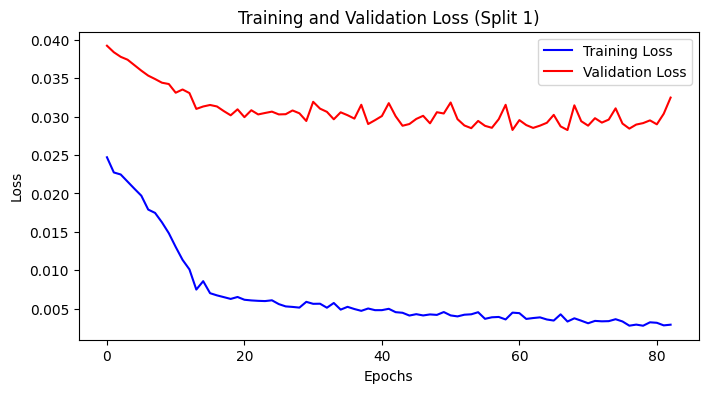

Model for Split 1 saved successfully.
Training on Split 2...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


26/26 [==============================] - 0s 763us/step
Split 2 - RMSE: 2626.9774, MAE: 1469.3910


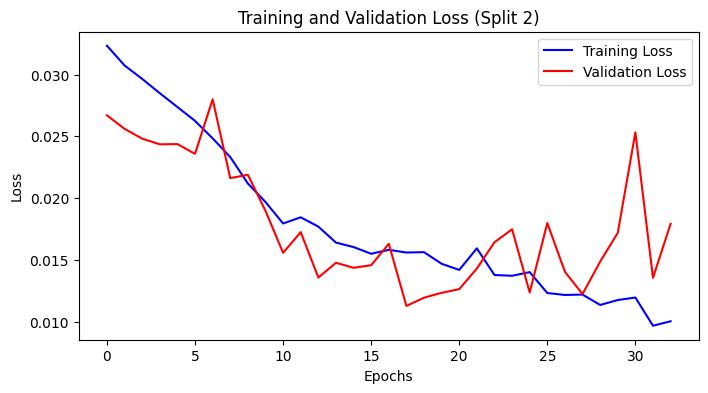

Model for Split 2 saved successfully.
Training on Split 3...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


26/26 [==============================] - 0s 837us/step
Split 3 - RMSE: 1136.7066, MAE: 786.0593


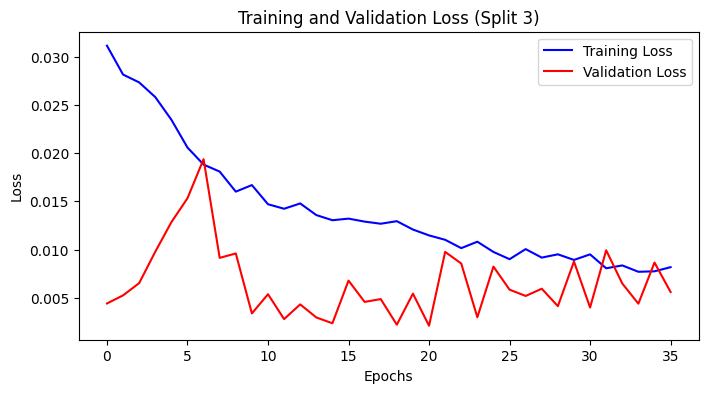

Model for Split 3 saved successfully.
Training on Split 4...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


26/26 [==============================] - 0s 681us/step
Split 4 - RMSE: 624.5595, MAE: 409.4142


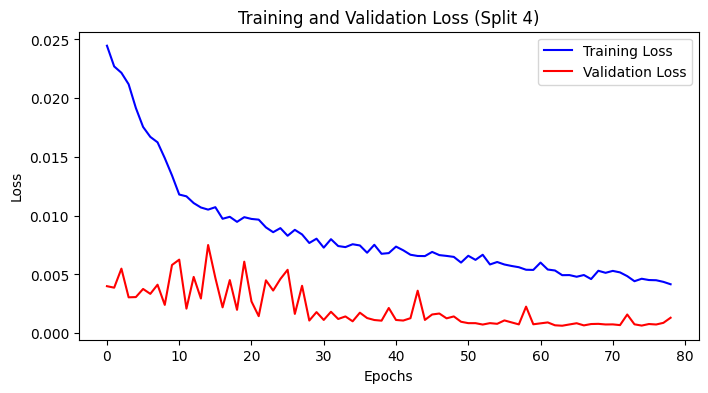

Model for Split 4 saved successfully.
Training on Split 5...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


26/26 [==============================] - 0s 2ms/step
Split 5 - RMSE: 1241.8549, MAE: 975.1915


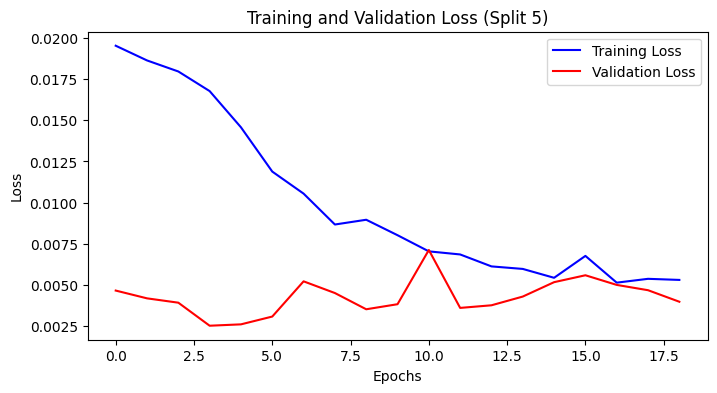

Model for Split 5 saved successfully.

Cross-Validation Ensemble Results:
Average RMSE: 1958.1851
Average MAE: 1131.3275


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


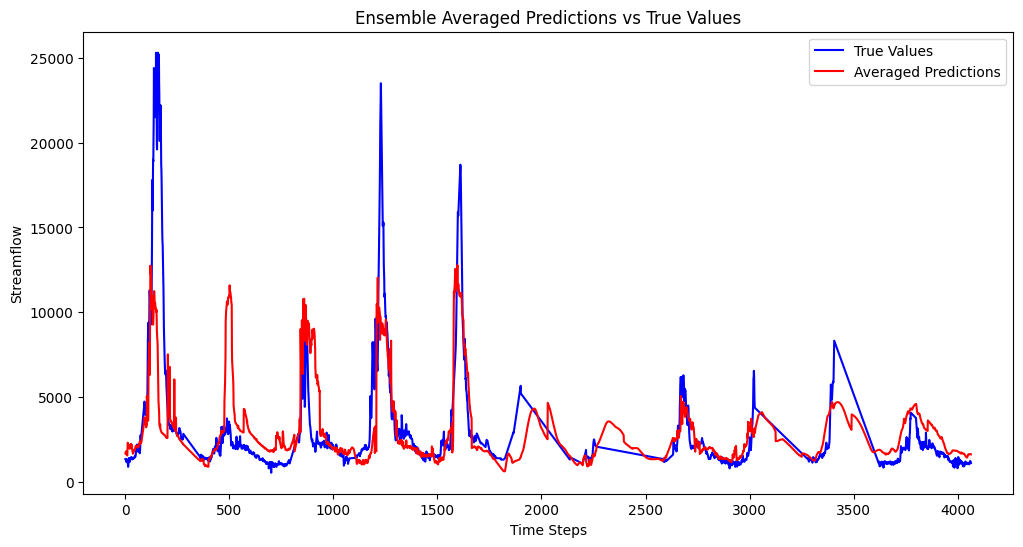

In [4]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import joblib
from keras.optimizers.legacy import Adam

# Early stopping configuration
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Pre-scale the entire dataset globally
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_raw = df.drop(columns=['streamflow'])  # Input features
y_raw = df['streamflow']  # Target variable

# Fit scalers on the entire dataset
X_scaled = scaler_X.fit_transform(X_raw)
y_scaled = scaler_y.fit_transform(y_raw.values.reshape(-1, 1))

# Save the global scalers for later use
joblib.dump(scaler_X, 'models/scaler_X_global.pkl')
joblib.dump(scaler_y, 'models/scaler_y_global.pkl')
print("Global scalers saved successfully.")

# Time Series Split Configuration
tscv = TimeSeriesSplit(n_splits=5)

# Store metrics and predictions across all splits
rmse_list = []
mae_list = []
all_preds = []      # List to hold predictions from all splits
all_actuals = []    # List to hold true values from all splits

# Loop through each split in TimeSeriesSplit
split_index = 1
for train_index, test_index in tscv.split(X_scaled):
    print(f"Training on Split {split_index}...")

    # Train-test split using pre-scaled data
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_scaled[train_index], y_scaled[test_index]

    # Reshape for LSTM input
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Define LSTM Model
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mse')

    # Train the Model
    history = model.fit(
        X_train, y_train, epochs=100, verbose=0, batch_size=32,
        validation_data=(X_test, y_test), callbacks=[early_stopping]
    )

    # Predict and store results
    y_pred = model.predict(X_test)
    y_pred_rescaled = scaler_y.inverse_transform(y_pred)
    y_test_rescaled = scaler_y.inverse_transform(y_test)

    all_preds.extend(y_pred_rescaled.flatten())
    all_actuals.extend(y_test_rescaled.flatten())

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
    mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
    rmse_list.append(rmse)
    mae_list.append(mae)

    print(f"Split {split_index} - RMSE: {rmse:.4f}, MAE: {mae:.4f}")

    # Plot training and validation loss for each split
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
    plt.title(f'Training and Validation Loss (Split {split_index})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Save the model
    model.save(f"models/lstm_model_fold{split_index}.h5")  # Save the trained model
    print(f"Model for Split {split_index} saved successfully.")
    split_index += 1

# Combine all predictions and actuals
final_preds = np.array(all_preds)
final_actuals = np.array(all_actuals)

# Calculate overall metrics
avg_rmse = np.mean(rmse_list)
avg_mae = np.mean(mae_list)
print("\nCross-Validation Ensemble Results:")
print(f"Average RMSE: {avg_rmse:.4f}")
print(f"Average MAE: {avg_mae:.4f}")

# Plot consolidated predictions vs actuals
plt.figure(figsize=(12, 6))
plt.plot(final_actuals, label='True Values', color='blue')
plt.plot(final_preds, label='Averaged Predictions', color='red')
plt.title('Ensemble Averaged Predictions vs True Values')
plt.xlabel('Time Steps')
plt.ylabel('Streamflow')
plt.legend()
plt.show()

# Predict with RCP Scenarios

In [5]:
df_rcp45 = pd.read_csv(
    'data/predictions/rcp45_snow_rf_soilmoisture_lstm_predictions.csv', index_col=0, parse_dates=True)
df_rcp85 = pd.read_csv(
    'data/predictions/rcp85_snow_rf_soilmoisture_lstm_predictions.csv', index_col=0, parse_dates=True)

# add same features
df_rcp45['prec_year'] = df_rcp45['PREC_Avg'].groupby(df_rcp45.index.year).cumsum()
df_rcp45['prec_rolling'] = df_rcp45['PREC_Avg'].rolling(window=30).mean()
df_rcp45['temp_rolling'] = df_rcp45['TAVG_Avg'].rolling(window=30).mean()
df_rcp45['soil_rolling'] = df_rcp45['soilmoisture_Avg_8ft'].rolling(window=30).mean()
df_rcp45['dayofyear'] = df_rcp45.index.dayofyear
df_rcp45['sin_dayofyear'] = np.sin(2*np.pi*df_rcp45['dayofyear']/365)
df_rcp45['cos_dayofyear'] = np.cos(2*np.pi*df_rcp45['dayofyear']/365)

df_rcp85['prec_year'] = df_rcp85['PREC_Avg'].groupby(df_rcp85.index.year).cumsum()
df_rcp85['prec_rolling'] = df_rcp85['PREC_Avg'].rolling(window=30).mean()
df_rcp85['temp_rolling'] = df_rcp85['TAVG_Avg'].rolling(window=30).mean()
df_rcp85['soil_rolling'] = df_rcp85['soilmoisture_Avg_8ft'].rolling(window=30).mean()
df_rcp85['dayofyear'] = df_rcp85.index.dayofyear
df_rcp85['sin_dayofyear'] = np.sin(2*np.pi*df_rcp85['dayofyear']/365)
df_rcp85['cos_dayofyear'] = np.cos(2*np.pi*df_rcp85['dayofyear']/365)

df_rcp45 = df_rcp45.sort_index().reindex(columns=df.columns)
df_rcp85 = df_rcp85.sort_index().reindex(columns=df.columns)
df_rcp45 = df_rcp45.dropna(subset=['prec_rolling', 'temp_rolling', 'soil_rolling'])
df_rcp85 = df_rcp85.dropna(subset=['prec_rolling', 'temp_rolling', 'soil_rolling'])
display(df_rcp45, df_rcp85)

,PREC_Avg,TAVG_Avg,soilmoisture_Avg_8ft,Snow,streamflow,prec_year,prec_rolling,temp_rolling,soil_rolling,dayofyear,sin_dayofyear,cos_dayofyear
time,,,,,,,,,,,,
2006-01-30 12:00:00,2.592942,16.299992,17.351016,1,NaN,44.493768,1.483126,23.223791,14.436170,30,4.937756e-01,0.869589
2006-01-31 12:00:00,2.592942,27.272213,17.322869,1,NaN,47.086710,1.569400,23.096730,14.706932,31,5.086709e-01,0.860961
2006-02-01 12:00:00,2.593391,31.274729,17.074762,1,NaN,49.680101,1.645637,23.393285,14.969424,32,5.234156e-01,0.852078
2006-02-02 12:00:00,2.594664,24.935026,16.870588,1,NaN,52.274765,1.720172,23.573343,15.225111,33,5.380052e-01,0.842942
2006-02-03 12:00:00,2.601046,21.481874,16.697251,1,NaN,54.875811,1.794919,23.830469,15.475019,34,5.524353e-01,0.833556
...,...,...,...,...,...,...,...,...,...,...,...,...
2100-12-27 12:00:00,27.937475,39.995155,25.947626,1,NaN,5896.129146,27.894015,36.885914,25.248856,361,-6.880243e-02,0.997630
2100-12-28 12:00:00,27.938652,35.275560,25.833564,1,NaN,5924.067798,27.896113,37.214156,25.241393,362,-5.161967e-02,0.998667
2100-12-29 12:00:00,27.938660,28.253563,25.831460,1,NaN,5952.006458,27.898210,37.133476,25.243655,363,-3.442161e-02,0.999407


,PREC_Avg,TAVG_Avg,soilmoisture_Avg_8ft,Snow,streamflow,prec_year,prec_rolling,temp_rolling,soil_rolling,dayofyear,sin_dayofyear,cos_dayofyear
time,,,,,,,,,,,,
2006-01-30 12:00:00,2.239401,28.573797,15.959198,1,NaN,42.871709,1.429057,21.981437,13.816520,30,4.937756e-01,0.869589
2006-01-31 12:00:00,2.239407,32.932182,16.151044,1,NaN,45.111116,1.503557,22.042566,14.048222,31,5.086709e-01,0.860961
2006-02-01 12:00:00,2.247728,28.678800,16.308308,1,NaN,47.358844,1.568231,22.252132,14.285165,32,5.234156e-01,0.852078
2006-02-02 12:00:00,2.247747,30.933344,16.383022,1,NaN,49.606591,1.631189,22.631842,14.524599,33,5.380052e-01,0.842942
2006-02-03 12:00:00,2.248361,39.262460,16.583585,1,NaN,51.854952,1.694167,23.481412,14.770719,34,5.524353e-01,0.833556
...,...,...,...,...,...,...,...,...,...,...,...,...
2100-12-27 12:00:00,32.626354,40.788258,25.361338,1,NaN,6348.835813,32.161526,38.291567,25.926905,361,-6.880243e-02,0.997630
2100-12-28 12:00:00,32.643470,40.686527,25.366339,1,NaN,6381.479283,32.193288,38.194772,25.899159,362,-5.161967e-02,0.998667
2100-12-29 12:00:00,32.649437,37.635570,25.386576,1,NaN,6414.128720,32.225226,37.931623,25.872653,363,-3.442161e-02,0.999407


In [6]:
from keras.models import load_model

# Load global scalers
scaler_X = joblib.load('models/scaler_X_global.pkl')
scaler_y = joblib.load('models/scaler_y_global.pkl')

# Scale RCP datasets using the global input scaler
df_rcp45_scaled = scaler_X.transform(df_rcp45.drop(columns=['streamflow']))
df_rcp85_scaled = scaler_X.transform(df_rcp85.drop(columns=['streamflow']))

# Placeholder for RCP predictions
rcp45_preds = []
rcp85_preds = []

# Load models and predict
for i in range(1, 6):  # Assuming 5 splits
    print(f"Predicting with model fold {i}...")

    # Load the trained model
    model = load_model(f"models/lstm_model_fold{i}.h5")

    # Reshape RCP data for LSTM input
    X_rcp45 = df_rcp45_scaled.reshape((df_rcp45_scaled.shape[0], df_rcp45_scaled.shape[1], 1))
    X_rcp85 = df_rcp85_scaled.reshape((df_rcp85_scaled.shape[0], df_rcp85_scaled.shape[1], 1))

    # Predict and inverse transform
    rcp45_pred = model.predict(X_rcp45)
    rcp85_pred = model.predict(X_rcp85)

    rcp45_preds.append(scaler_y.inverse_transform(rcp45_pred).flatten())
    rcp85_preds.append(scaler_y.inverse_transform(rcp85_pred).flatten())

# Average Predictions Across All Models
rcp45_streamflow_pred_rescaled = np.mean(rcp45_preds, axis=0)
rcp85_streamflow_pred_rescaled = np.mean(rcp85_preds, axis=0)

Predicting with model fold 1...
1084/1084 [==============================] - 1s 554us/step
Predicting with model fold 2...
1084/1084 [==============================] - 1s 569us/step
Predicting with model fold 3...
1084/1084 [==============================] - 1s 572us/step
Predicting with model fold 4...
1084/1084 [==============================] - 1s 589us/step
Predicting with model fold 5...
1084/1084 [==============================] - 1s 571us/step


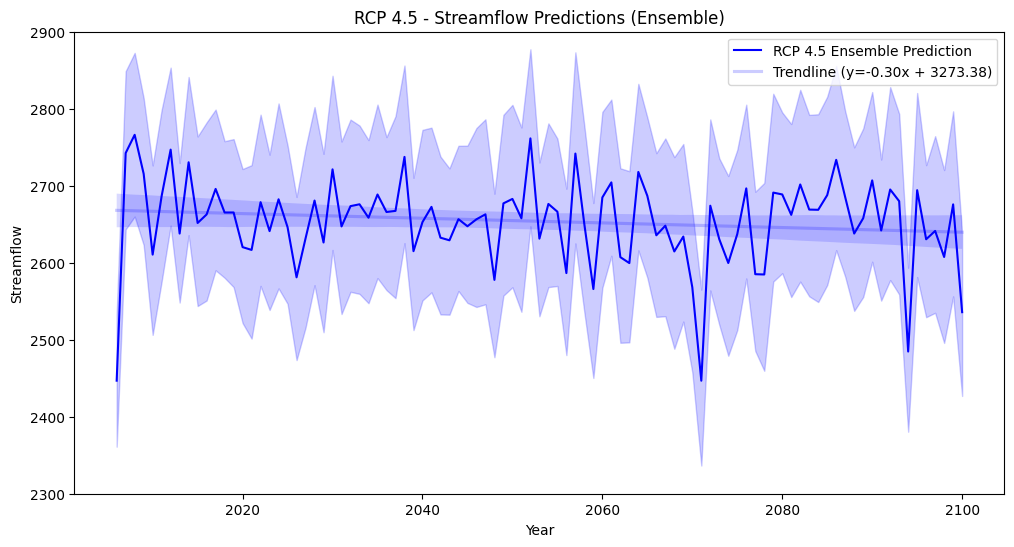

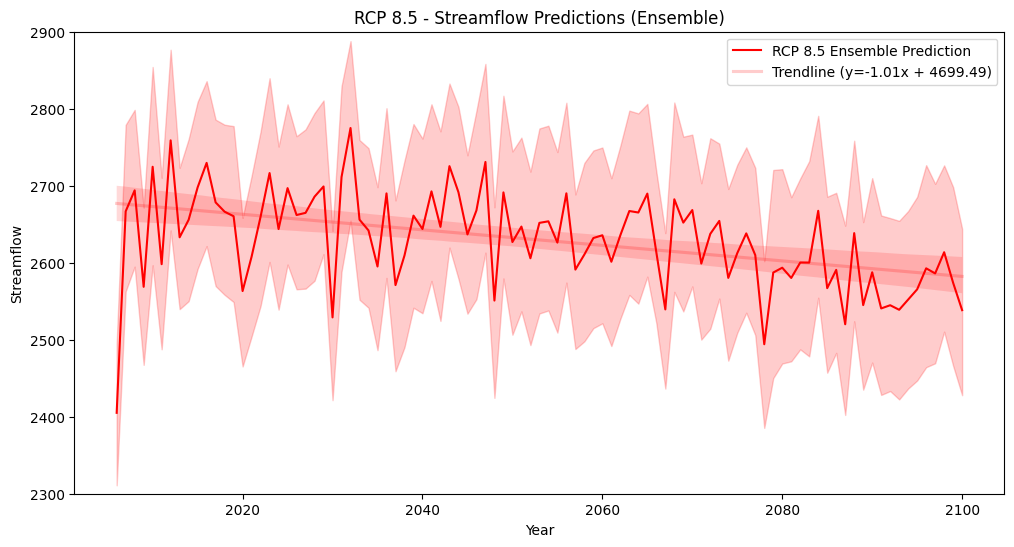

In [14]:
# Ensure x-axis is a flat numeric array
x_years_rcp45 = df_rcp45.index.year.to_numpy()
x_years_rcp85 = df_rcp85.index.year.to_numpy()

# Calculate trendline for RCP 4.5
slope_rcp45, intercept_rcp45 = np.polyfit(x_years_rcp45, rcp45_streamflow_pred_rescaled, 1)
trendline_label_rcp45 = f'Trendline (y={slope_rcp45:.2f}x + {intercept_rcp45:.2f})'

# Plot Results for RCP 4.5
plt.figure(figsize=(12, 6))
sns.lineplot(x=x_years_rcp45, y=rcp45_streamflow_pred_rescaled, label='RCP 4.5 Ensemble Prediction', color='blue')
sns.regplot(x=x_years_rcp45, y=rcp45_streamflow_pred_rescaled, scatter=False, color='blue', label=trendline_label_rcp45, line_kws={'alpha':0.2})
plt.title('RCP 4.5 - Streamflow Predictions (Ensemble)')
plt.xlabel('Year')
plt.ylabel('Streamflow')
plt.ylim(2300, 2900)
plt.legend()
plt.show()

# Calculate trendline for RCP 8.5
slope_rcp85, intercept_rcp85 = np.polyfit(x_years_rcp85, rcp85_streamflow_pred_rescaled, 1)
trendline_label_rcp85 = f'Trendline (y={slope_rcp85:.2f}x + {intercept_rcp85:.2f})'

# Plot Results for RCP 8.5
plt.figure(figsize=(12, 6))
sns.lineplot(x=x_years_rcp85, y=rcp85_streamflow_pred_rescaled, label='RCP 8.5 Ensemble Prediction', color='red')
sns.regplot(x=x_years_rcp85, y=rcp85_streamflow_pred_rescaled, scatter=False, color='red', label=trendline_label_rcp85, line_kws={'alpha':0.2})
plt.title('RCP 8.5 - Streamflow Predictions (Ensemble)')
plt.xlabel('Year')
plt.ylabel('Streamflow')
plt.ylim(2300, 2900)
plt.legend()
plt.show()

In [15]:
# final dataset
df_rcp45['streamflow'] = rcp45_streamflow_pred_rescaled
df_rcp85['streamflow'] = rcp85_streamflow_pred_rescaled

df_rcp45.to_csv('data/predictions/rcp45_streamflow_lstm_predictions.csv')
df_rcp85.to_csv('data/predictions/rcp85_streamflow_lstm_predictions.csv')